In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
data = pd.read_csv("AviationData.txt", delimiter="|")
data.describe()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
count,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,...,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428
unique,73349,2,74428,11561,23841,171,14701,15586,9200,21565,...,2726,115,41,62,359,4,13,4,3139,1
top,20001212X19172,Accident,ERA14FA068,06/30/1984,"ANCHORAGE, AK",United States,,,,,...,,0,0,0,1,VMC,LANDING,Probable Cause,,
freq,3,71584,1,25,372,70757,53144,53153,32705,29806,...,70752,40380,42975,40358,21333,66572,17747,69938,12840,74428


In [161]:
def print_row_col(data):

    n_rows = data.shape[0]
    n_cols = data.shape[1]
    print(f"There are {n_rows} rows in the airplane crash dataset")
    print(f"There are {n_cols} columns in the airplane crash dataset")

In [162]:
def clean_data(data):

    # Drop columns that seem to have significant missing data or are not relevant
    data.drop(columns=['Event Id ', ' Registration Number ', ' Make ', ' Model ', ' Amateur Built ', ' FAR Description ', ' Schedule ', ' Air Carrier ', ' Broad Phase of Flight ', ' Report Status ', ' Publication Date '], inplace=True)
    data = data.iloc[:, :-1]
    # Replace missing columns with NaN
    data.replace(r'^\s*$', np.NaN, regex=True, inplace=True)
    # Remove extra whitespace in columns 
    data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x).rename(columns=lambda x: x.strip())
    # Decided to drop these columns
    data.drop(columns=['Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured'], inplace=True) # Columns that appear to be primarily empty
    # Fill NaN values with zero
    data.fillna(value={'Total Fatal Injuries': 0, 'Aircraft Category': 'Airplane'}, inplace=True)
    # Convert to int
    data['Total Fatal Injuries'] = data['Total Fatal Injuries'].astype(int)

    return data




In [163]:
# Look at data before proprocessing
print(data.describe())
print(data.head(1))
print_row_col(data)


              Event Id   Investigation Type   Accident Number    Event Date   \
count             74428                74428             74428         74428   
unique            73349                    2             74428         11561   
top     20001212X19172             Accident        ERA14FA068    06/30/1984    
freq                  3                71584                 1            25   

              Location          Country   Latitude   Longitude   \
count             74428            74428      74428       74428   
unique            23841              171      14701       15586   
top      ANCHORAGE, AK    United States                           
freq                372            70757      53144       53153   

        Airport Code   Airport Name   ...  Air Carrier   \
count           74428          74428  ...         74428   
unique           9200          21565  ...          2726   
top                                   ...                 
freq            32705      

In [164]:
# Preprocess data
data = clean_data(data)

/Users/adam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [165]:
# Look at data after proprocessing
print(data.describe())
print(data.head(1))
print_row_col(data)


       Total Fatal Injuries
count          74428.000000
mean               0.563189
std                5.063542
min                0.000000
25%                0.000000
50%                0.000000
75%                0.000000
max              349.000000
  Investigation Type Accident Number  Event Date          Location  \
0           Accident      ERA14FA068  12/08/2013  Jacksonville, FL   

         Country   Latitude   Longitude Airport Code  \
0  United States  30.319723  -81.514167          CRG   

                     Airport Name Injury Severity Aircraft Damage  \
0  Jacksonville Executive Airport        Fatal(3)     Substantial   

  Aircraft Category Number of Engines    Engine Type Purpose of Flight  \
0          Airplane                 2  Reciprocating          Personal   

   Total Fatal Injuries Weather Condition  
0                     3               IMC  
There are 74428 rows in the airplane crash dataset
There are 17 columns in the airplane crash dataset


In [166]:
# Look at NaNs
print(data.isna().sum())
print(data.isna().mean()*100) # Percent of NaNs in data for each column


Investigation Type          0
Accident Number             0
Event Date                  2
Location                   89
Country                   511
Latitude                53144
Longitude               53153
Airport Code            32705
Airport Name            29806
Injury Severity            56
Aircraft Damage          2161
Aircraft Category           0
Number of Engines        3230
Engine Type              2721
Purpose of Flight        3010
Total Fatal Injuries        0
Weather Condition        1516
dtype: int64
Investigation Type       0.000000
Accident Number          0.000000
Event Date               0.002687
Location                 0.119579
Country                  0.686570
Latitude                71.403235
Longitude               71.415328
Airport Code            43.941796
Airport Name            40.046757
Injury Severity          0.075241
Aircraft Damage          2.903477
Aircraft Category        0.000000
Number of Engines        4.339765
Engine Type              3.655882
P

7509

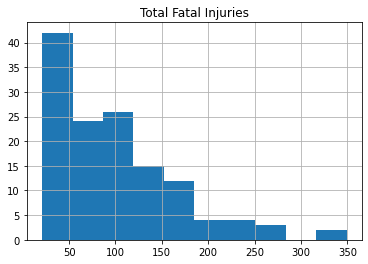

In [175]:
# Looking at histogram of fatal injuries above 100
data[data['Total Fatal Injuries'] > 20].hist() # looking at only plane crashes with greater than 100 fatalities
len(data[data['Total Fatal Injuries'] > 1]) # Dropped down to 54 plane crashes

In [168]:
# Make new dataframe filtered by > 25 Total Fatal Injuries
data_sig_fatal = data[data['Total Fatal Injuries'] > 25] # Drop to only crashes including more than 25 fatalities

In [169]:
data.loc[data['Event Date']=='09/11/2001'] # Looking at 9/11 attacks 


,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Weather Condition
22942,Accident,DCA01MA065,09/11/2001,"Shanksville, PA",United States,NaN,NaN,NaN,NaN,Fatal(44),Destroyed,Airplane,NaN,NaN,NaN,44,NaN
22943,Accident,DCA01MA064,09/11/2001,"Arlington, VA",United States,NaN,NaN,NaN,NaN,Fatal(64),Destroyed,Airplane,NaN,NaN,NaN,64,NaN
22944,Accident,DCA01MA063,09/11/2001,"New York City, NY",United States,NaN,NaN,NaN,NaN,Fatal(65),Destroyed,Airplane,2,Turbo Fan,NaN,65,NaN
22945,Accident,DCA01MA060,09/11/2001,"New York City, NY",United States,NaN,NaN,NaN,NaN,Fatal(92),Destroyed,Airplane,2,Turbo Fan,NaN,92,NaN


In [170]:
data['Country'].value_counts()
# Interesting to see most of the large plane crashes are in the US folowed by Colombia, Peru, Nigeria

United States    70757
Canada             204
Mexico             188
Bahamas            182
Australia          158
                 ...  
Eritrea              1
Ivory Coast          1
Niger                1
Madagascar           1
Bermuda              1
Name: Country, Length: 170, dtype: int64

In [171]:
# Check fatality rate for plane crashes?
# Is Fatal?
# Are flights overall becoming more safe?
# Are large planes safer than small planes?
# Is it dangerous to fly in bad weather?

<!-- Narrow to United states
Lat/Long only 30% of data
Plot by state maybe
Fatality rate {by_state, by_plane_type, by_year, by_weather}
Build classifier based off US to predict fatalities -->

In [177]:
# Add column is_fatal
US_accidents = data[data['Country'] == 'United States']
US_accidents

,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Weather Condition
0,Accident,ERA14FA068,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,2,Reciprocating,Personal,3,IMC
1,Accident,ERA14FA066,12/06/2013,"Sebring, FL",United States,27.463333,-81.366667,SEF,Sebring Regional Airport,Fatal(1),Destroyed,Helicopter,1,Unknown,Positioning,1,NaN
2,Accident,ANC14CA010,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,0,NaN
3,Accident,ERA14CA062,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,0,NaN
4,Accident,ERA14LA059,12/02/2013,"Trenton, SC",United States,33.736944,-81.818611,6J6,Edgefield County Airport,Non-Fatal,Substantial,Airplane,1,NaN,Personal,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74422,Accident,LAX96LA321,06/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,1,Reciprocating,Personal,2,IMC
74423,Accident,NYC07LA005,08/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,Airplane,1,Reciprocating,Personal,3,IMC
74424,Accident,LAX94LA336,07/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,Airplane,1,Reciprocating,Personal,4,UNK
74425,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,1,Reciprocating,Personal,2,UNK


 CA              7811
 FL              4938
 AK              4912
 TX              4910
 AZ              2410
                 ... 
Kauai               1
 San Juan Is.       1
 Maui               1
 MP                 1
 FT. MYER           1
Name: Location_State, Length: 79, dtype: int64


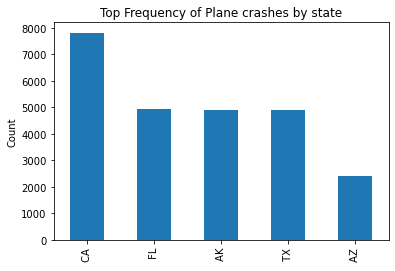

In [197]:
# Location (Stolen from Ryan's notebook)
US_accidents[['Location_City','Location_State']] = US_accidents['Location'].str.split(',',expand=True)[[0,1]]
US_accidents[['Location','Location_City','Location_State']].head()

US_accidents.groupby(['Location_State']).count()

freq_by_state = US_accidents['Location_State'].value_counts()
print(freq_by_state)
freq_by_state[:5].plot(kind='bar', title='Top Frequency of Plane crashes by state', ylabel='Count')

